### 步骤 1：数据准备

1. 读取GeoNames数据库文件：
   - 下载并读取包含城市信息的GeoNames数据库文件。
   - 筛选出中国的城市并提取其名称和地理坐标。
2. 获取和处理文件名：
   - 从指定目录中获取所有文件名，并去掉扩展名，得到城市名称。
   - 将中文城市名转换为拼音，并将每个字符串的首字母大写。
   - 构成二元组的列表并转换为字典，用于后续的查找。
3. 读取和筛选目标城市数据：
   - 读取“最令外国游客向往的50个城市”的名单，并转换为拼音。

In [1]:
import pandas as pd
import os
from pypinyin import lazy_pinyin
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 下载GeoNames数据库文件并筛选中国的城市
url = 'cities1000.txt'
cities_data = pd.read_csv(url, sep='\t', names=[
    'geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude',
    'feature class', 'feature code', 'country code', 'cc2', 'admin1 code',
    'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation',
    'dem', 'timezone', 'modification date'
])
china_cities_coordinates = cities_data[cities_data['country code'] == 'CN'][['name', 'latitude', 'longitude']]
print(china_cities_coordinates.head())

# 获取目录下文件名（去掉扩展名）
def get_filenames_without_extension(directory_path):
    try:
        return [os.path.splitext(item)[0] for item in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, item))]
    except Exception as e:
        print(f"error: {e}")
        return []

directory_path = "附件"  
filenames = get_filenames_without_extension(directory_path)
print(filenames, len(filenames))

# 转换文件名为拼音并首字母大写
pinyin_filenames = [''.join(lazy_pinyin(city)).capitalize() for city in filenames]
print(pinyin_filenames, len(pinyin_filenames))

# 构成二元组的列表并转换为字典
city_tuples = list(zip(pinyin_filenames, filenames)) 
city_dict = dict(city_tuples)
print(city_dict)

# 根据拼音文件名查找中国城市
filtered_df = china_cities_coordinates[china_cities_coordinates['name'].isin(pinyin_filenames)]

# 新增一列“城市”并去重
filtered_df['城市'] = filtered_df['name'].map(city_dict)
filtered_df = filtered_df.drop_duplicates(subset=['城市'])
print(filtered_df)

            name  latitude  longitude
20945     Zongga  29.00000   85.25000
20946       Zito  30.73893   95.83613
20947  Zhowagoin  28.65910   97.45065
20948    Zhefang  24.26667   98.28333
20949     Zhedao  24.81934   98.27627
['定西', '韶关', '银川', '眉山', '琼中', '盘锦', '固原', '滁州', '东营', '恩施', '文山', '安顺', '龙岩', '商丘', '潜江', '广州', '汕尾', '乐山', '淮北', '大连', '厦门', '双河', '博尔塔拉', '五家渠', '屯昌', '宜春', '平顶山', '鹤壁', '三明', '呼和浩特', '永州', '苏州', '丽水', '乌兰察布', '三亚', '泉州', '绍兴', '晋城', '温州', '中卫', '郑州', '兰州', '淮南', '牡丹江', '雄安新区', '佛山', '台州', '阿勒泰', '大兴安岭', '石家庄', '伊春', '阿拉善盟', '德宏', '抚州', '许昌', '阿拉尔', '南昌', '六安', '太原', '可克达拉', '湛江', '阳江', '怀化', '河池', '普洱', '西安', '湘潭', '玉溪', '商洛', '临沧', '沈阳', '岳阳', '潍坊', '五指山', '舟山', '徐州', '巢湖', '铁门关', '烟台', '陵水', '黔西南', '娄底', '定安', '庆阳', '嘉峪关', '荆州', '白山', '六盘水', '湘西', '七台河', '攀枝花', '吐鲁番', '海口', '太湖', '红河', '常德', '渭南', '吉安', '珠海', '淄博', '扬州', '松原', '玉林', '衢州', '双鸭山', '包头', '林芝', '保亭', '清远', '宜宾', '滨州', '黄山', '芜湖', '天津', '那曲', '揭阳', '驻马店', '白沙', '济南', '曲靖', '唐山', '鹰潭', '郴州', '梅州


### 步骤 2：筛选和合并数据

4. 根据拼音查找城市：
   - 根据拼音文件名在中国城市坐标数据中进行查找，并创建新的DataFrame。
   - 新增一列“城市”存放城市的中文名，并去重。
5. 读取和筛选景点数据：
   - 读取指定目录下的所有CSV文件，提取其中评分为5.0的景点。
   - 将筛选出的景点数据合并到一个DataFrame中。
6. 更新景点信息：
   - 初始化新的列（如“建议游玩时间”、“门票”）。
   - 遍历CSV文件，更新DataFrame中的对应列。

### 步骤 3：数据处理和转换

7. 处理建议游玩时间：
   - 将建议游玩时间字段中的值转换为最小小时数。
   - 例如：“建议游览时间：1天 - 2天” 转换为 24小时。
8. 处理门票价格：
   - 将门票字段中的值转换为具体的票价，并处理特殊情况（如免费、具体收费情况等）。
   - 填充缺失的门票价格，并将其转换为整数类型。
   - 例如：“50元” 转换为 50。

In [2]:
import pandas as pd
from pypinyin import lazy_pinyin

# 读取数据
top50 = pd.read_csv('最令外国游客向往的50个城市（AHP）最终版.csv')
top50 = top50['来源城市'].values

# 将中文城市名转换为拼音并首字母大写
capitalized_50 = [''.join(lazy_pinyin(city)).capitalize() for city in top50]

# 构成二元组的列表并转换为字典
city50_tuples = list(zip(capitalized_50, top50))
city_dict = dict(city50_tuples)

# 根据 capitalized_filenames 进行查找
filtered50_df = china_cities_coordinates[china_cities_coordinates['name'].isin(capitalized_50)]

# 新增一列“城市”，存放城市的中文名
filtered50_df['城市'] = filtered50_df['name'].map(city_dict)
filtered50_df = filtered50_df.drop_duplicates(subset=['城市'])

# 去掉索引为 21393 的行
filtered50_df = filtered50_df.drop(index=21393, errors='ignore')

# 输出结果
print(filtered50_df, filtered50_df.shape)


            name  latitude  longitude   城市
21050  Jiayuguan  39.81121   98.28618  嘉峪关
21155   Baicheng  41.77389   81.86889   白城
21278  Zhongshan  24.52913  111.29704   中山
21392   Yuncheng  35.59833  115.93472   运城
21417  Qianjiang  30.42100  112.89190   潜江
21523   Yangzhou  32.39722  119.43583   扬州
21605    Xinzhou  38.40917  112.73333   忻州
21730   Xianning  29.84347  114.32201   咸宁
21734     Zhuhai  22.27694  113.56778   珠海
21792    Changde  29.03205  111.69844   常德
21846    Weifang  36.71000  119.10194   潍坊
21948   Tangshan  39.63333  118.18333   唐山
21960    Taizhou  32.49069  119.90812   台州
21980     Suqian  33.94917  118.29583   宿迁
22018   Shuozhou  39.31583  112.42250   朔州
22138    Shanwei  22.78199  115.34750   汕尾
22178      Sanya  18.25435  109.50947   三亚
22457   Nanchong  30.79508  106.08473   南充
22508    Meishan  31.72913  115.91241   眉山
22549     Luzhou  28.89030  105.42575   泸州
22717     Lingao  19.90873  109.68717   临高
22725    Lijiang  23.57110  102.00417   丽江
22817     J

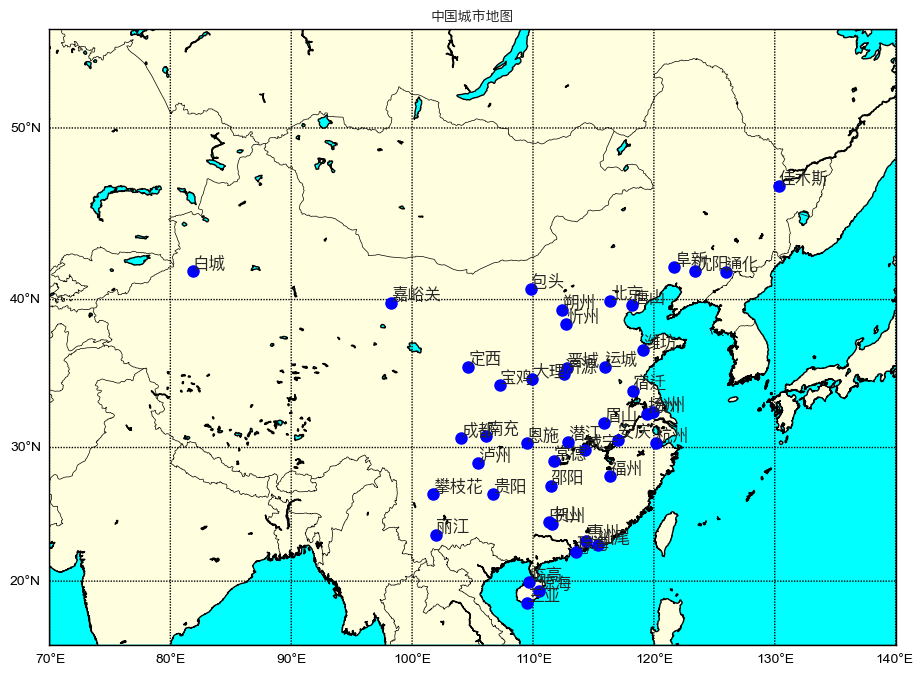

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.font_manager as fm

font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 创建绘制图
plt.figure(figsize=(12, 8))

# 创建 Basemap 地图
m = Basemap(projection='merc', llcrnrlat=15, urcrnrlat=55, llcrnrlon=70, urcrnrlon=140, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightyellow', lake_color='aqua')
m.drawparallels(range(0, 90, 10), labels=[1,0,0,0])
m.drawmeridians(range(0, 180, 10), labels=[0,0,0,1])

# 在地图上添加城市标记
for _, city in filtered50_df.iterrows():
    x, y = m(city['longitude'], city['latitude'])
    m.plot(x, y, 'bo', markersize=8)
    plt.text(x, y, city['城市'], fontsize=12, fontproperties=font_prop, ha='left', va='bottom')

# 设置标题
plt.title("中国城市地图", fontsize=20, fontproperties=font_prop)

# 显示图
plt.show()

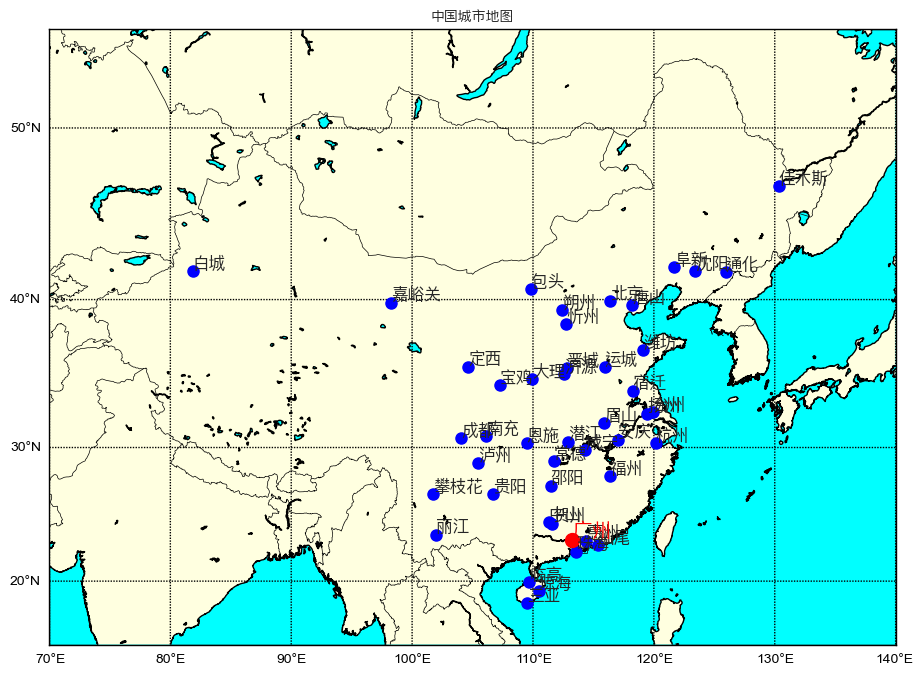

In [4]:
# 广州的经纬度
guangzhou_lat = 23.1291
guangzhou_lon = 113.2644

# 创建绘制图
plt.figure(figsize=(12, 8))

# 创建 Basemap 地图
m = Basemap(projection='merc', llcrnrlat=15, urcrnrlat=55, llcrnrlon=70, urcrnrlon=140, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightyellow', lake_color='aqua')
m.drawparallels(range(0, 90, 10), labels=[1,0,0,0])
m.drawmeridians(range(0, 180, 10), labels=[0,0,0,1])

# 在地图上添加城市标记
for _, city in filtered50_df.iterrows():
    x, y = m(city['longitude'], city['latitude'])
    m.plot(x, y, 'bo', markersize=8)
    plt.text(x, y, city['城市'], fontsize=12, fontproperties=font_prop, ha='left', va='bottom')

# 在地图中标出广州
x, y = m(guangzhou_lon, guangzhou_lat)
m.plot(x, y, 'ro', markersize=10)
plt.text(x, y, '广州', fontsize=14, fontproperties=font_prop, ha='left', va='bottom', color='red')

# 设置标题
plt.title("中国城市地图", fontsize=20, fontproperties=font_prop)

# 显示图
plt.show()

In [5]:
# 查看评分和建议游玩时间中包含的所有可能值
directory = '附件'
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        city_data = pd.read_csv(os.path.join(directory, filename))
        unique_values_menpiao = city_data['门票'].unique()
        unique_values_youwan = city_data['建议游玩时间'].unique()
        print(f"{filename} - 门票: {unique_values_menpiao}")
        print(f"{filename} - 建议游玩时间: {unique_values_youwan}")

# 存放结果的DataFrame
result_df = pd.DataFrame(columns=['City', '名字', '评分'])

# 遍历附件目录中的所有CSV文件
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        city_name = filename[:-4]  # 去掉文件后缀，得到城市名称
        city_data = pd.read_csv(os.path.join(directory, filename))

        # 去掉NaN和'--'值，并将评分转换为float类型
        city_data['评分'] = city_data['评分'].replace('--', np.nan).dropna().astype(float)
        
        # 找到评分为5.0的景点
        high_score_spots = city_data[city_data['评分'] == 5.0]
        
        # 仅在存在评分为5.0的景点时处理
        if not high_score_spots.empty:
            high_score_spots = high_score_spots.copy()  # 避免 SettingWithCopyWarning
            high_score_spots['City'] = city_name  # 直接修改 DataFrame
            result_df = pd.concat([result_df, high_score_spots[['City', '名字', '评分']]], ignore_index=True)

# 输出结果
print(result_df)

# 找到result_df中City在filtered50_df中的城市
filtered_cities = filtered50_df['城市'].unique()
filtered_result_df = result_df[result_df['City'].isin(filtered_cities)]
print(filtered_result_df)

定西.csv - 门票: ['门票：15元；云麓宫5元；麓山寺5元；鸟语林20元 成人团体票：12元/人；学生团体票：10/人' nan
 "{'贵清山旅游风景区门票成人票\\n\\n': ['¥50起'], '贵清山旅游风景区门票老人票\\n\\n': ['¥25起'], '贵清山旅游风景区门票优待票\\n\\n': ['¥25起']}"
 '具体收费情况以现场公示为主' '20元' '25元' '免费' '收费' '目前景区暂未开启线上购票渠道，游客需至景区现场购票入园。'
 '40元']
定西.csv - 建议游玩时间: [nan '建议游览时间：3小时 - 5小时' '建议游览时间：2小时 - 3小时' '建议游览时间：12小时 - 3天'
 '建议游览时间：1小时 - 3小时' '建议游览时间：1小时 - 2小时' '建议游览时间：3小时' '建议游览时间：0.5小时 - 1小时'
 '建议游览时间：3天' '建议游览时间：2小时']
韶关.csv - 门票: ["{'丹霞山门票成人票\\n\\n': ['¥50起'], '水上丹霞游船票成人票\\n\\n': ['¥110起'], '丹霞山索道单程（上行）票成人票\\n\\n': ['¥39起']}"
 '具体收费情况以现场公示为主' '免费' "{'南岭国家森林公园电子讲解导览服务成人票\\n\\n': ['¥9起']}"
 "{'广东大峡谷门票成人票\\n\\n': ['¥54.8起'], '广东大峡谷门票优待票\\n\\n': ['¥35起'], '广东大峡谷门票双人票\\n\\n': ['¥110起']}"
 nan '包含于丹霞山风景名胜区景区门票内，通用于丹霞山风景名胜区景区门票。'
 "{'云门寺电子导览服务大小同价\\n\\n': ['¥9起']}" "{'金鸡岭门票成人票\\n\\n': ['¥35起']}"
 '上午138元,下午168元' '40元'
 "{'珠玑古巷门票成人票\\n\\n': ['¥38起'], '珠玑古巷门票优待票\\n\\n': ['¥20起'], '南雄珠玑古巷电子导览服务大小同价\\n\\n': ['¥1起']}"
 "{'帽子峰旅游景区门票成人票\\n\\n': ['¥25起'], '帽子峰旅游景区凌江游船包船票成人票\\n\\n': ['¥95起'], 

In [6]:
# 初始化新的列 '建议游玩时间'
filtered_result_df['建议游玩时间'] = np.nan

# 遍历CSV文件并更新建议游玩时间
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        city_name = filename[:-4]
        city_data = pd.read_csv(os.path.join(directory, filename))
        
        # 筛选出filtered_result_df中当前城市的景点
        city_spots = filtered_result_df[filtered_result_df['City'] == city_name]
        
        # 遍历当前城市的景点并更新建议游玩时间
        for idx, spot in city_spots.iterrows():
            match = city_data[city_data['名字'] == spot['名字']]
            if not match.empty:
                filtered_result_df.loc[idx, '建议游玩时间'] = match['建议游玩时间'].values[0]

# 去掉建议游玩时间为NaN的数据
filtered_result_df = filtered_result_df.dropna(subset=['建议游玩时间'])

# 输出结果
filtered_result_df

,City,名字,评分,建议游玩时间
1,定西,狼渡湿地草原Langdu Wetland Grassland,5.0,建议游览时间：12小时 - 3天
2,定西,临洮县博物馆Lintaoxian Museum,5.0,建议游览时间：1小时 - 2小时
3,定西,定西市马家窑彩陶博物馆Dingxishi Majiayao Caitao Museum,5.0,建议游览时间：3小时
6,定西,二郎山Erlangshan Mountain,5.0,建议游览时间：12小时 - 3天
7,定西,灞陵桥公园Weiyuan Balingqiao Park,5.0,建议游览时间：1小时 - 2小时
...,...,...,...,...
2464,成都,远拓新津白鹤滩国家湿地公园营地,5.0,建议游览时间：4小时 - 5小时
2465,成都,楠木溪Nanmu Brook,5.0,建议游览时间：3天
2467,成都,成都爱道堂,5.0,建议游览时间：1小时 - 2小时
2469,成都,花楸村Huaqiu Village,5.0,建议游览时间：1小时 - 2小时


In [7]:
# Ensure all values in '建议游玩时间' are treated as strings
filtered_result_df['建议游玩时间'] = filtered_result_df['建议游玩时间'].astype(str)

def convert_time_to_hours(time_str):
    time_str = time_str.replace('建议游览时间：', '').replace('天', '*24').replace('小时', '')
    min_time = eval(time_str.split(' - ')[0])
    return min_time

filtered_result_df['建议游玩时间'] = filtered_result_df['建议游玩时间'].apply(convert_time_to_hours)

filtered_result_df

,City,名字,评分,建议游玩时间
1,定西,狼渡湿地草原Langdu Wetland Grassland,5.0,12.0
2,定西,临洮县博物馆Lintaoxian Museum,5.0,1.0
3,定西,定西市马家窑彩陶博物馆Dingxishi Majiayao Caitao Museum,5.0,3.0
6,定西,二郎山Erlangshan Mountain,5.0,12.0
7,定西,灞陵桥公园Weiyuan Balingqiao Park,5.0,1.0
...,...,...,...,...
2464,成都,远拓新津白鹤滩国家湿地公园营地,5.0,4.0
2465,成都,楠木溪Nanmu Brook,5.0,72.0
2467,成都,成都爱道堂,5.0,1.0
2469,成都,花楸村Huaqiu Village,5.0,1.0


In [8]:
import re
# 初始化新的列 '建议游玩时间'
filtered_result_df['门票'] = np.nan

# 遍历CSV文件并更新建议游玩时间
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        city_name = filename[:-4]
        city_data = pd.read_csv(os.path.join(directory, filename))
        
        # 筛选出filtered_result_df中当前城市的景点
        city_spots = filtered_result_df[filtered_result_df['City'] == city_name]
        
        # 遍历当前城市的景点并更新建议游玩时间
        for idx, spot in city_spots.iterrows():
            match = city_data[city_data['名字'] == spot['名字']]
            if not match.empty:
                filtered_result_df.loc[idx, '门票'] = match['门票'].values[0]

# 处理门票字段
def adjust_ticket_price(ticket):
    if isinstance(ticket, str):
        if '免费' in ticket:
            return 0
        elif '具体收费情况以景区现场公示为主。' in ticket:
            return np.nan
        elif '元' in ticket:
            price = re.findall(r'\d+', ticket)
            if price:
                return int(price[0])
        elif '￥' in ticket or '¥' in ticket:
            price = re.findall(r'\d+', ticket)
            if price:
                return int(price[0])
    return np.nan  # 如果没有匹配到任何情况，将其设置为NaN

filtered_result_df['门票'] = filtered_result_df['门票'].apply(adjust_ticket_price)

# 计算门票列的均值
mean_value = filtered_result_df['门票'].mean()

# 用均值填充NaN值
filtered_result_df['门票'].fillna(mean_value, inplace=True)

# 将门票列转换为整数类型
filtered_result_df['门票'] = filtered_result_df['门票'].astype(int)

# 计算每个城市的最短游玩时间
shortest_visit_time_df = filtered_result_df.loc[filtered_result_df.groupby('City')['建议游玩时间'].idxmin()]

# 输出结果
shortest_visit_time_df

,City,名字,评分,建议游玩时间,门票
278,三亚,太阳湾路Sun Bay Road,5.0,0.5,52
1709,中山,虎逊岩,5.0,1.0,52
1253,临高,茉莉轩Molixuan,5.0,2.0,52
1609,丽江,泸源涯,5.0,0.5,0
2262,佳木斯,乌苏大桥Wusu Bridge,5.0,0.5,52
799,包头,希拉穆仁花海Xilamuren Flower Sea,5.0,2.0,52
1926,北京,长城公园Changchen Park,5.0,1.0,52
343,台州,石塘镇Shitangzhen,5.0,12.0,52
1010,咸宁,康丰源生态旅游区,5.0,12.0,52
908,唐山,伯雍公园,5.0,1.0,52


### 步骤 4：计算和分析

9. 计算城市间的地理距离：
   - 使用Haversine公式计算城市间的地理距离。
   - Haversine公式:
     $$
     d = 2R \cdot \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)}\right)
     $$
  其中：
     $$
     \Delta\phi = \phi_2 - \phi_1
     $$
     $$
     \Delta\lambda = \lambda_2 - \lambda_1
     $$
  $\phi$ 是纬度，$\lambda$ 是经度，$R$ 是地球半径（约6371公里）。
10. 计算旅行时间和成本：
    - 基于地理距离，计算旅行时间（假设高铁速度为300公里/小时）。
      $$
      \text{TravelTime (hours)} = \frac{\text{Distance (km)}}{300}
      $$
    基于地理距离，计算高铁旅行成本（假设每公里票价为0.48到0.74元的平均值）。
      $$
      \text{TravelCost (￥)} = \text{Distance (km)} \times \frac{0.48 + 0.74}{2}
      $$

### 步骤 5：构建城市间的图并规划游玩路线

11. 构建城市间的图：
    - 使用NetworkX构建城市间的图，边权重为旅行时间和旅行成本。
12. 规划游玩路线：
    - 使用启发式算法规划游玩路线，考虑时间限制、旅行时间和游玩时间。
    - 计算总花费时间和费用，并输出游玩的城市数量。

### 启发式算法详细原理和步骤

1. 初始化参数：
   - 设置起始城市（如“惠州”）。
   - 设置时间限制（如144小时），并扣除初始到达时间和休息时间。
     $$
     \text{time\_limit} = 144 \text{小时} - \text{travel\_time\_to\_start} - \text{sleep\_time}
     $$
   - 初始化总旅行时间和总费用。
   - 初始化已访问城市列表。
2. 迭代寻找下一个城市：
   - 当前城市从未访问城市中选择邻居城市，计算旅行时间和游玩时间。
     $$
     \text{neighbors} = \left\{ \text{neighbor} \mid \text{neighbor} \notin \text{visited\_cities} \right\}
     $$
   - 按照高铁车程时间升序排序，选择时间最短的下一个城市。
     $$
     \text{next\_city} = \min(\text{neighbors}, \text{key} = \text{travel\_time})
     $$
   - 计算到下一个城市的游玩时间和门票费用。
3. 检查时间限制：
   - 判断是否在剩余时间内可以游玩下一个城市。
     $$
     \text{if } \text{total\_travel\_time} + \text{travel\_time} + \text{visit\_time} + \text{waste\_time} > \text{time\_limit} \text{ then break}
     $$
   - 如果可以，更新总时间和总费用，添加城市到已访问列表。
     $$
     \text{total\_travel\_time} += \text{travel\_time} + \text{visit\_time} + \text{waste\_time}
     $$
     $$
     \text{total\_cost} += \text{travel\_cost} + \text{transport\_cost}
     $$
     $$
     \text{visited\_cities.append(next\_city)}
     $$
   - 如果不可以，结束迭代。
4. 输出结果：
   - 输出规划的游玩路线，包括总花费时间、总费用和游玩的城市数量。

In [9]:
import networkx as nx
from math import radians, sin, cos, sqrt, atan2

# Haversine公式计算地理距离
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # 地球半径，单位为公里
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# 计算城市间的地理距离并生成DataFrame
distances = [
    [city1['城市'], city2['城市'], haversine(city1['longitude'], city1['latitude'], city2['longitude'], city2['latitude'])]
    for i, city1 in filtered50_df.iterrows()
    for j, city2 in filtered50_df.iterrows()
    if city1['城市'] != city2['城市']
]

city_distances = pd.DataFrame(distances, columns=['City1', 'City2', 'Distance (km)'])

# 计算旅行时间和成本
# 高铁票价是根据实际行驶的公里数来计算的。一般来说，票价为每公里0.48元到0.74元不等，具体取决于列车类型和座位等级。
city_distances['TravelTime (hours)'] = city_distances['Distance (km)'] / 300
city_distances['TravelCost (￥)'] = city_distances['Distance (km)'] * (0.48 + 0.74) / 2

# 输出结果
city_distances

,City1,City2,Distance (km),TravelTime (hours),TravelCost (￥)
0,嘉峪关,白城,1396.971092,4.656570,852.152366
1,嘉峪关,中山,2089.479739,6.964932,1274.582641
2,嘉峪关,运城,1618.602535,5.395342,987.347547
3,嘉峪关,潜江,1685.849330,5.619498,1028.368091
4,嘉峪关,扬州,2064.576287,6.881921,1259.391535
...,...,...,...,...,...
1887,宝鸡,佳木斯,2374.339648,7.914465,1448.347185
1888,宝鸡,阜新,1517.152481,5.057175,925.463014
1889,宝鸡,包头,735.491547,2.451638,448.649844
1890,宝鸡,攀枝花,1014.020097,3.380067,618.552259


In [10]:
# 构建城市间的图
G = nx.Graph()
for _, row in city_distances.iterrows():
    G.add_edge(row['City1'], row['City2'], weight=[row['TravelTime (hours)'], row['TravelCost (￥)']])
dist = haversine(113.2644, 23.0691, filtered50_df[filtered50_df['城市']=='惠州']['longitude'], filtered50_df[filtered50_df['城市']=='惠州']['latitude'])
time = dist/300
dist, time

(117.80874501634047, 0.3926958167211349)

In [11]:
# 初始化起点和时间限制
# start_city = '广州'
start_city = '惠州'
# time_limit = 144 # 小时
sleep_time = 6*8
time_limit = 144 - time - sleep_time  # 小时
total_travel_time = 0
total_cost = 0 + dist * (0.48+0.74)/2
visited_cities = [start_city]
waste_time = 3

In [12]:
# 启发式算法规划游玩路线
current_city = start_city
while total_travel_time < time_limit:
    # 查找当前城市能到达的城市及其高铁车程时间
    neighbors = [(neighbor, G.edges[current_city, neighbor]['weight']) for neighbor in G.neighbors(current_city) if neighbor not in visited_cities]
    
    if not neighbors:
        break

    # 按高铁车程时间升序排序，选择时间最短的下一个城市
    neighbors.sort(key=lambda x: x[1])
    next_city, (travel_time, transport_cost) = neighbors[0]
    
    # 找到下一个城市的最短游玩时间
    if shortest_visit_time_df[shortest_visit_time_df['City'] == next_city]['建议游玩时间'].values:
        visit_time = shortest_visit_time_df[shortest_visit_time_df['City'] == next_city]['建议游玩时间'].values[0]
        travel_cost = shortest_visit_time_df[shortest_visit_time_df['City'] == next_city]['门票'].values[0]
    else:
        visit_time = 2
        travel_cost = 0
    
    # 判断是否在剩余时间内可以游玩下一个城市
    if total_travel_time + travel_time + visit_time + waste_time > time_limit:
        break

    # 更新总时间和总费用
    total_travel_time += travel_time + visit_time + waste_time 
    total_cost += travel_cost + transport_cost
    visited_cities.append(next_city)
    current_city = next_city

# 输出规划的游玩路线
print("游玩路线：", " -> ".join(visited_cities))
print("总花费时间：", total_travel_time + sleep_time, "小时")
print("总花费费用：", total_cost , "￥")
print("游玩的城市数量：", len(visited_cities) - 1)

游玩路线： 惠州 -> 汕尾 -> 珠海 -> 贺州 -> 中山 -> 邵阳 -> 常德 -> 潜江 -> 咸宁 -> 眉山 -> 安庆 -> 福州 -> 杭州 -> 扬州 -> 台州 -> 宿迁
总花费时间： 143.0714706481641 小时
总花费费用： 3259.442463073998 ￥
游玩的城市数量： 15


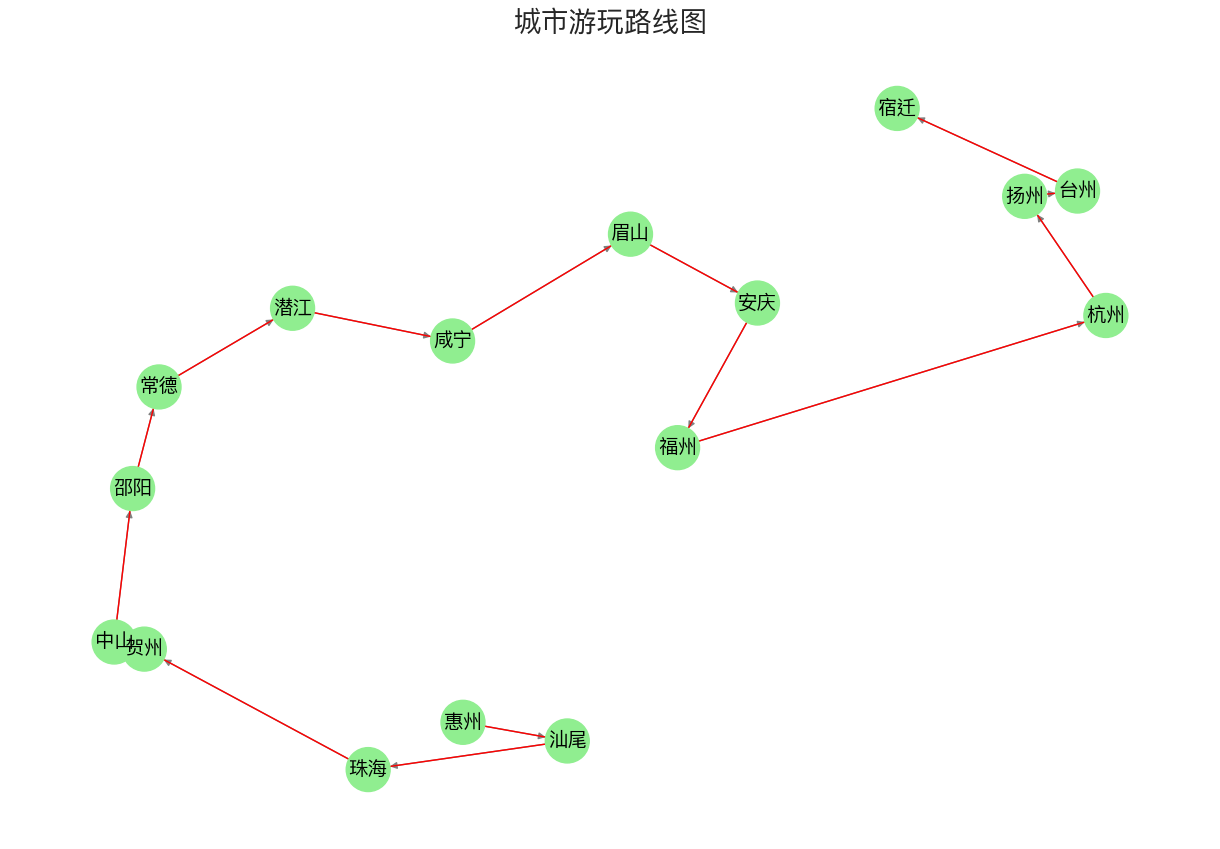

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置自定义字体路径
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 设置中文字体
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数显示问题

# 构建包含城市及其经纬度的DataFrame
city_coords = filtered50_df.set_index('城市').loc[visited_cities]

# 创建绘制图
plt.figure(figsize=(12, 8))

# 创建NetworkX图
G = nx.DiGraph()

# 添加节点和边
for city in visited_cities:
    G.add_node(city, pos=(city_coords.loc[city, 'longitude'], city_coords.loc[city, 'latitude']))

for i in range(len(visited_cities) - 1):
    G.add_edge(visited_cities[i], visited_cities[i + 1])

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制节点和边
node_colors = ['lightgreen' if city in visited_cities else 'skyblue' for city in G.nodes()]
nx.draw(G, pos, with_labels=False, node_size=1000, node_color=node_colors, edge_color="gray")

# 绘制路线
path_edges = list(zip(visited_cities[:-1], visited_cities[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', arrows=True)

# 添加标签
nx.draw_networkx_labels(G, pos, labels=dict(zip(visited_cities, visited_cities)), font_size=14, font_weight="bold", font_family=font_prop.get_name())

# 设置标题
plt.title("城市游玩路线图", fontproperties=font_prop, fontsize=20)
plt.xlabel("经度", fontproperties=font_prop, fontsize=16)
plt.ylabel("纬度", fontproperties=font_prop, fontsize=16)

# 添加网格和背景
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # 灰色网格
plt.gca().set_facecolor('lightyellow')  # 浅黄色背景

# 显示图
plt.show()

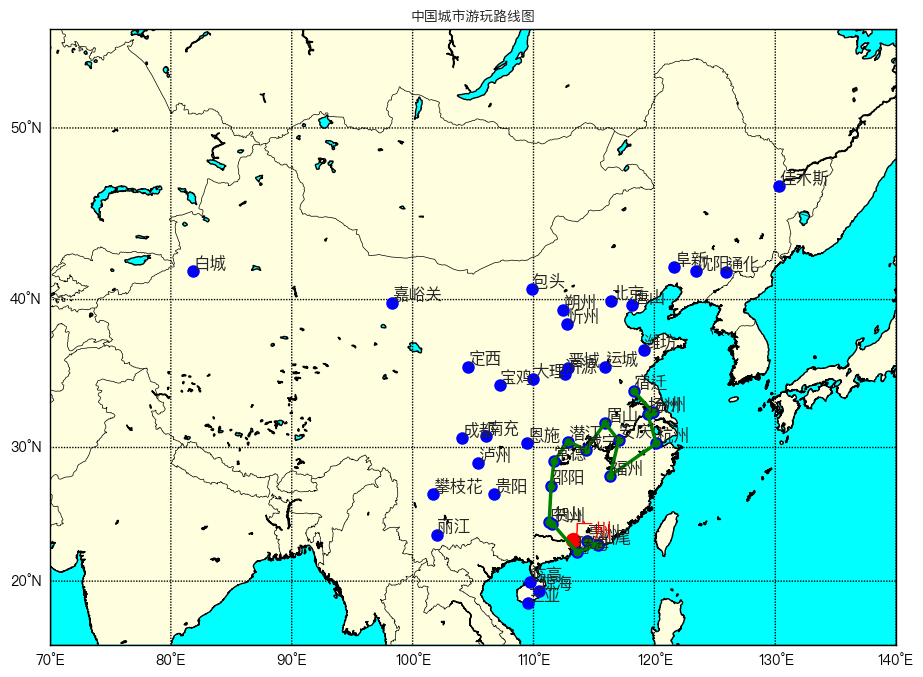

In [14]:
# 创建绘制图
plt.figure(figsize=(12, 8))

# 创建 Basemap 地图
m = Basemap(projection='merc', llcrnrlat=15, urcrnrlat=55, llcrnrlon=70, urcrnrlon=140, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightyellow', lake_color='aqua')
m.drawparallels(range(0, 90, 10), labels=[1,0,0,0])
m.drawmeridians(range(0, 180, 10), labels=[0,0,0,1])

# 在地图上添加城市标记
for _, city in filtered50_df.iterrows():
    x, y = m(city['longitude'], city['latitude'])
    m.plot(x, y, 'bo', markersize=8)
    plt.text(x, y, city['城市'], fontsize=12, fontproperties=font_prop, ha='left', va='bottom')

# 在地图中标出广州
x, y = m(113.2644, 23.1291)
m.plot(x, y, 'ro', markersize=10)
plt.text(x, y, '广州', fontsize=14, fontproperties=font_prop, ha='left', va='bottom', color='red')

# 添加路线
coords = [(filtered50_df[filtered50_df['城市'] == city]['latitude'].values[0], filtered50_df[filtered50_df['城市'] == city]['longitude'].values[0]) for city in visited_cities]
route_x, route_y = zip(*[m(lon, lat) for lat, lon in coords])
m.plot(route_x, route_y, color='green', linewidth=2.5, linestyle='-', marker='o', markersize=5)

# 设置标题
plt.title("中国城市游玩路线图", fontsize=20, fontproperties=font_prop)

# 显示图
plt.show()